# Section B Classification and web development
* trackID: unique identifier for each song (Maps features to their labels)
* title: title of the song. Type: text.
* tags: A comma-separated list of tags representing the words that appeared in the lyrics of the song and are assigned by human annotators. Type: text / categorical.
* loudness: overall loudness in dB. Type: float / continuous.
* tempo: estimated tempo in beats per minute (BPM). Type: float / continuous.
* time_signature: estimated number of beats per bar. Type: integer.
* key: key the track is in. Type: integer/ nominal. 
* mode: major or minor. Type: integer / binary.
* duration: duration of the song in seconds. Type: float / continuous.
* vect_1 ... vect_148: 148 columns containing pre-computed audio features of each song. 
	- These features were pre-extracted (NO TEMPORAL MEANING) from the 30 or 60 second snippets, and capture timbre, chroma, and mfcc aspects of the audio. \
	- Each feature takes a continuous value. Type: float / continuous.

#### Folder Structure
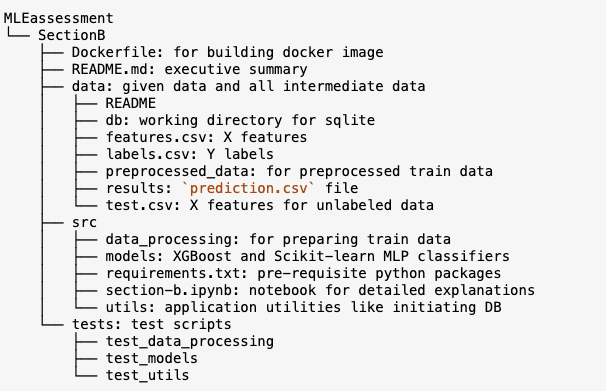

##### Docker file 
run:
- `docker build -t python-classifier . ` command to build image.
- `docker run -p 8000:8000 python-classifier` command to run image

>*please note that Docker uses `ENV PYTHONPATH=/MLEassessment:$PYTHONPATH` while running on local uses defalt root dir.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()    #set seaborn format

## Load Data

In [2]:
# load data

df_feat = pd.read_csv('../data/features.csv')
df_y = pd.read_csv('../data/labels.csv')
df_test = pd.read_csv('../data/test.csv')

In [3]:
df_feat.shape, df_y.shape, df_test.shape

((8128, 157), (8128, 2), (428, 157))

### Feature Data

In [4]:
df_feat.sample(2)

,trackID,title,tags,loudness,tempo,time_signature,key,mode,duration,vect_1,...,vect_139,vect_140,vect_141,vect_142,vect_143,vect_144,vect_145,vect_146,vect_147,vect_148
4035,6825,Oil Man's War,"i, the, you, to, and, a, it, not, in, my, is, ...",-6.056,117.348,4.0,7.0,1.0,241.65832,50.423112,...,0.000967,0.001014,0.001043,0.001043,0.001040,0.001050,0.001025,0.000976,0.120396,0.519462
3569,2709,Moonskin,"the, to, and, a, in, is, of, that, on, will, n...",-6.377,158.159,4.0,5.0,0.0,236.87791,48.240926,...,0.000418,0.000430,0.000432,0.000413,0.000394,0.000357,0.000353,0.000384,0.151821,1.988777


In [5]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Columns: 157 entries, trackID to vect_148
dtypes: float64(154), int64(1), object(2)
memory usage: 9.7+ MB


In [6]:
df_feat.describe()

,trackID,loudness,tempo,time_signature,key,mode,duration,vect_1,vect_2,vect_3,...,vect_139,vect_140,vect_141,vect_142,vect_143,vect_144,vect_145,vect_146,vect_147,vect_148
count,8128.000000,8118.000000,8117.000000,8119.000000,8113.000000,8119.000000,8119.000000,8118.000000,8120.000000,8117.000000,...,8125.000000,8127.000000,8127.000000,8126.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000
mean,4277.619341,-9.528668,125.731032,3.570144,5.239492,0.684813,238.529555,43.676100,3.925979,8.670058,...,0.000717,0.000766,0.000792,0.000816,0.000812,0.000781,0.000746,0.000697,0.194084,5.181209
std,2473.352897,4.402895,34.672811,1.195778,3.591466,0.464619,88.411735,5.656777,48.410113,29.747908,...,0.000652,0.000687,0.000714,0.000723,0.000718,0.000711,0.000686,0.000648,0.086342,41.428973
min,0.000000,-35.726000,0.000000,0.000000,0.000000,0.000000,5.276280,17.606993,-289.862566,-140.558193,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2133.750000,-12.197000,99.836000,3.000000,2.000000,0.000000,186.200360,40.056564,-26.148983,-8.704819,...,0.000279,0.000299,0.000305,0.000319,0.000317,0.000299,0.000292,0.000274,0.129872,0.733115
50%,4276.500000,-8.741500,121.773000,4.000000,5.000000,1.000000,228.048530,44.151439,8.617554,10.006663,...,0.000560,0.000595,0.000610,0.000634,0.000632,0.000598,0.000568,0.000530,0.179694,1.590191
75%,6419.250000,-6.120000,146.929000,4.000000,9.000000,1.000000,275.317100,48.003362,38.102432,27.194705,...,0.000917,0.000987,0.001022,0.001052,0.001052,0.000999,0.000946,0.000872,0.245001,3.743055
max,8555.000000,-0.414000,253.036000,7.000000,11.000000,1.000000,1271.718730,55.564543,150.885303,157.483210,...,0.006545,0.006613,0.006698,0.006682,0.006645,0.006777,0.006770,0.006632,0.767182,3193.622527


    primary key(int)  : `trackID`
    non-float features: `title`, `tags`
    


In [7]:
df_feat.isnull().sum().sort_values(ascending=False)

key         15
vect_12     13
vect_6      12
tags        12
vect_4      12
            ..
vect_93      0
vect_94      0
vect_97      0
vect_101     0
vect_148     0
Length: 157, dtype: int64

NULL values is low compared to the dataset length. Look at some distributions of the continuous variables

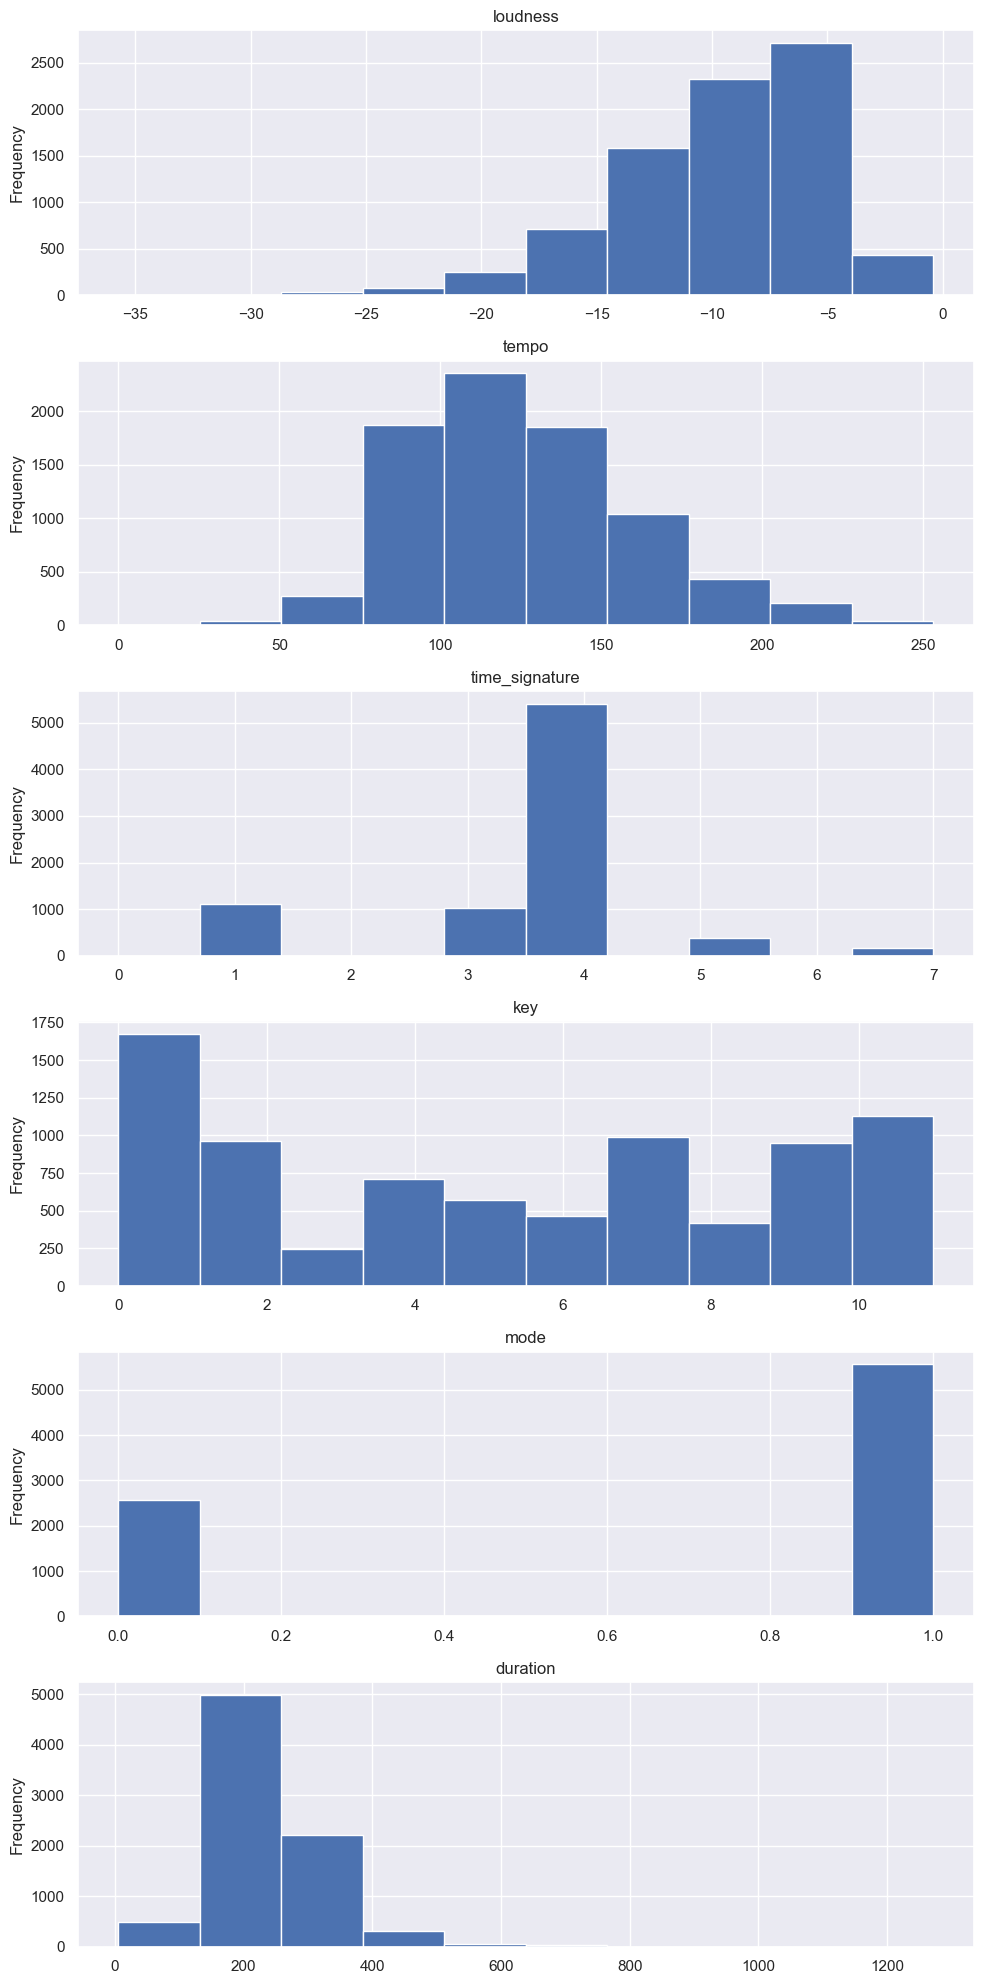

In [8]:
fig, axes = plt.subplots(nrows=len(["loudness", "tempo", "time_signature", "key", "mode", "duration"]), ncols=1, figsize=(10, 20))

# Iterate over each feature and plot its histogram on a separate subplot
for i, feat in enumerate(["loudness", "tempo", "time_signature", "key", "mode", "duration"]):
    df_feat[feat].plot(kind='hist', ax=axes[i])
    axes[i].set_title(feat)  # Set title for each subplot

plt.tight_layout()  # Adjust layout
plt.show()

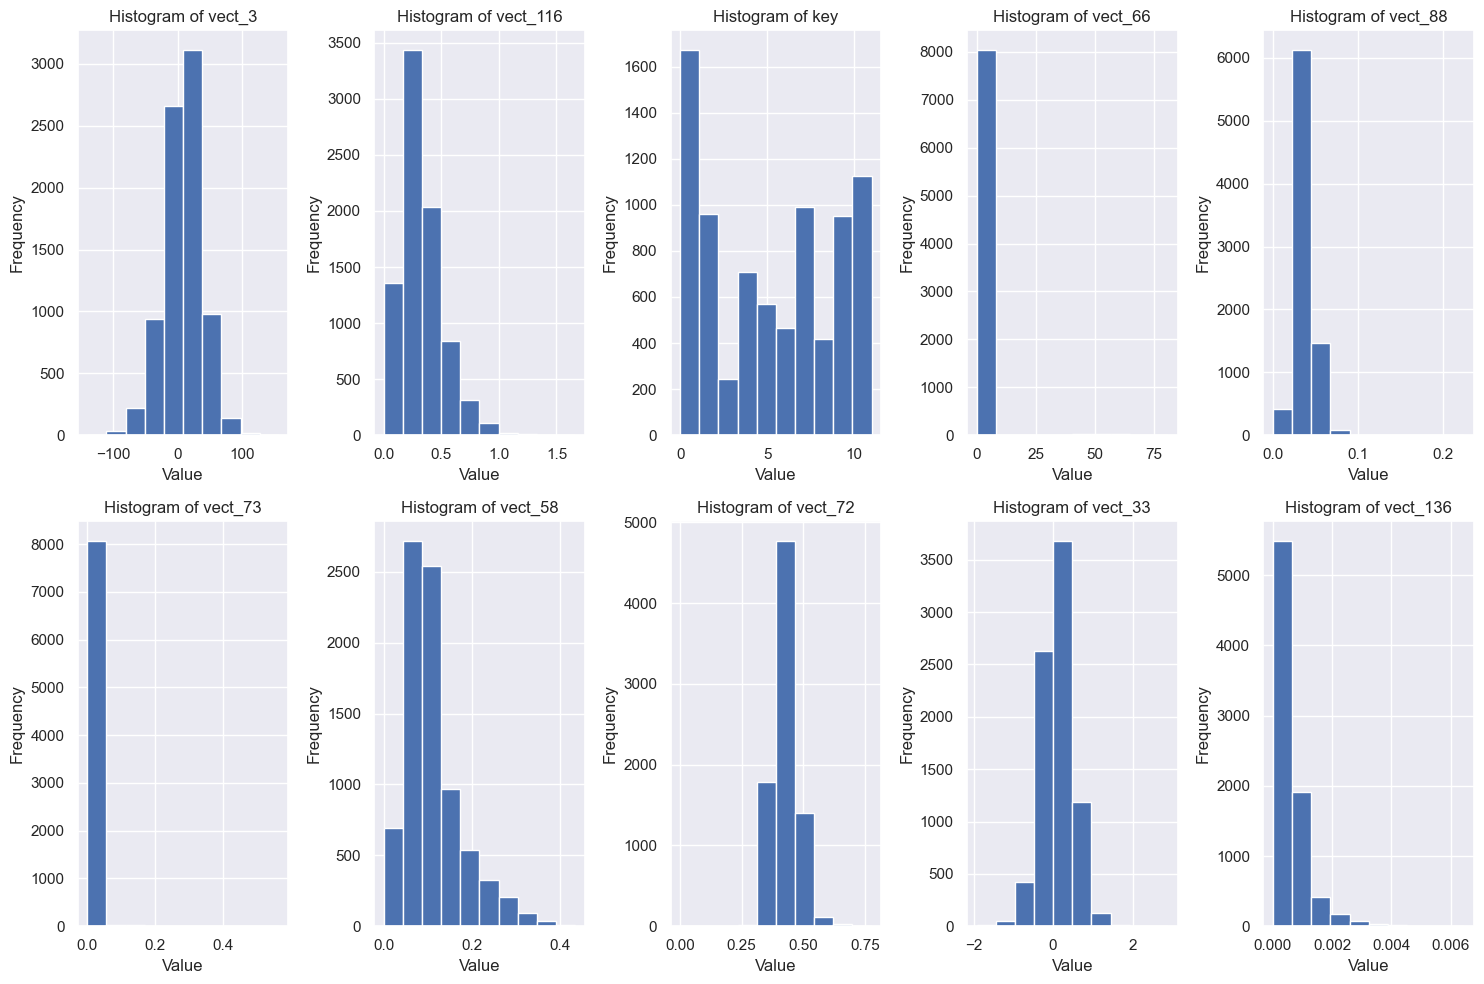

In [9]:
import random

random_column_indices = random.sample(range(len(df_feat.columns)), 10)

# Plot histograms for the randomly selected columns
plt.figure(figsize=(15, 10))
for i, column_index in enumerate(random_column_indices, start=1):
    plt.subplot(2, 5, i)
    random_column_name = df_feat.columns[column_index]
    df_feat[random_column_name].plot(kind='hist')
    plt.title(f'Histogram of {random_column_name}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


In [10]:
df_feat['vect_85'].sample()

6128    0.306442
Name: vect_85, dtype: float64

In [11]:
filtered_columns = []


# Check each column for unique values
for col in df_feat.columns:
    unique_values = df_feat[col].unique()
    if len(unique_values) < 40:
        filtered_columns.append(col)

# Display the columns where the number of unique values is less than 10
print("Columns where the number of unique values is less than 10:")
print(filtered_columns)


Columns where the number of unique values is less than 10:
['time_signature', 'key', 'mode']


We will assume that categorical features are only 'time_signature', 'key', 'mode'.

In [12]:
df_feat.head(1)

,trackID,title,tags,loudness,tempo,time_signature,key,mode,duration,vect_1,...,vect_139,vect_140,vect_141,vect_142,vect_143,vect_144,vect_145,vect_146,vect_147,vect_148
0,6654,Beside the Yellow Line,"i, the, to, and, a, me, it, not, in, my, is, o...",-8.539,104.341,3.0,7.0,1.0,298.73587,44.462048,...,0.000308,0.000302,0.000302,0.000315,0.000297,0.000305,0.000266,0.000225,0.130826,1.071914


### Data Enrichment
`title` and `tags` are make an aggregated feature like length of tags or longest word. However they will be dropped because they are not continuous and encoding them will be time consuming in preparation and training. It can be included if time had permitted.

### Labels

In [15]:
df_y.groupby(['genre']).count().sort_values(by='trackID',ascending=False) / len(df_y) *100

,trackID
genre,
classic pop and rock,20.718504
folk,20.484744
metal,14.874508
soul and reggae,12.155512
punk,12.069390
pop,8.993602
dance and electronica,6.434547
jazz and blues,4.269193


Considered rebalancing Labels since some categories are much more available in the data set than others. Example classic pop and rock is 5 times jazz and blues. However the imbalance is not dramatical (<50%). Although it was observed that underfit models will tend to `classic pop and rock`and `folk` regularly.

In [16]:
len(df_y)

8128

### Test data

In [17]:
df_test.sample(2)

,trackID,title,tags,loudness,tempo,time_signature,key,mode,duration,vect_1,...,vect_139,vect_140,vect_141,vect_142,vect_143,vect_144,vect_145,vect_146,vect_147,vect_148
46,579,Yeke Yeke,"i, to, la, wo, mi, le, kiss, ma, ah, ni, ta, k...",-6.028,125.821,4,10,0,236.74730,48.418171,...,0.000593,0.000665,0.000687,0.000742,0.000755,0.000713,0.000682,0.000573,0.165657,2.073122
350,693,Do You Sleep,"i, the, you, to, and, a, me, not, in, my, of, ...",-14.195,98.323,4,9,1,245.91628,37.200500,...,0.000474,0.000406,0.000490,0.000682,0.000861,0.000873,0.000567,0.000685,0.242948,7.227641


## Data preprocessing
`SectionB/src/data_processing/train_data_preprocessing.py`

In [17]:
# Drop nulls which are only a small portion of the data
df_feat.isnull().sum().sort_values(ascending=False)

key         15
vect_12     13
vect_6      12
tags        12
vect_4      12
            ..
vect_93      0
vect_94      0
vect_97      0
vect_101     0
vect_148     0
Length: 157, dtype: int64

#### Enriching with two more attributes
`tags_count`, might have some predictive power, some genres will have less words.


 `longest_tag_length`, complexity of words can also be another indicator
 
 
 Then the string columns are dropped.
 
#### Encoder
Label encoder is used to encode Y and is saved for later inversion of predictions

## Train Model
`SectionB/src/models/train_model.py`

Pipeline is created with
1. column transformer
    - standard scaler for continuous float variables
    - one hot encoder for cateforical variables
2. XGBoost


Model is trained with the pipeline. Cross validated for reference. XGBoost was compared to Scikit-learn MLP for quick reference. Although with more than 2e6 iterations MLP still had very high bias. XGBoost is relatively fast although the variance in accuracy from CV up to 5% difference only.

Model together with pipeline and encoder is saved as pickle file. Then used to predict test.csv and prediction.csv is created.

> Model managed 66% model accuracy on Cross Validated training data. This is higher than only choosing the majority "classic pop and rock" label (21%) 

## Webapp
API documentation: http://0.0.0.0:8000/docs#/

- main: starts webapp and calls below two functions to set up environment.`SectionB/src/utils/main.py`
- load_data_to_db: create DB and load existing data `SectionB/src/utils/load_data_to_db.py`
- load_trained_model: load trained XGBoost model for predicting `SectionB/src/utils/load_trained_model.py`

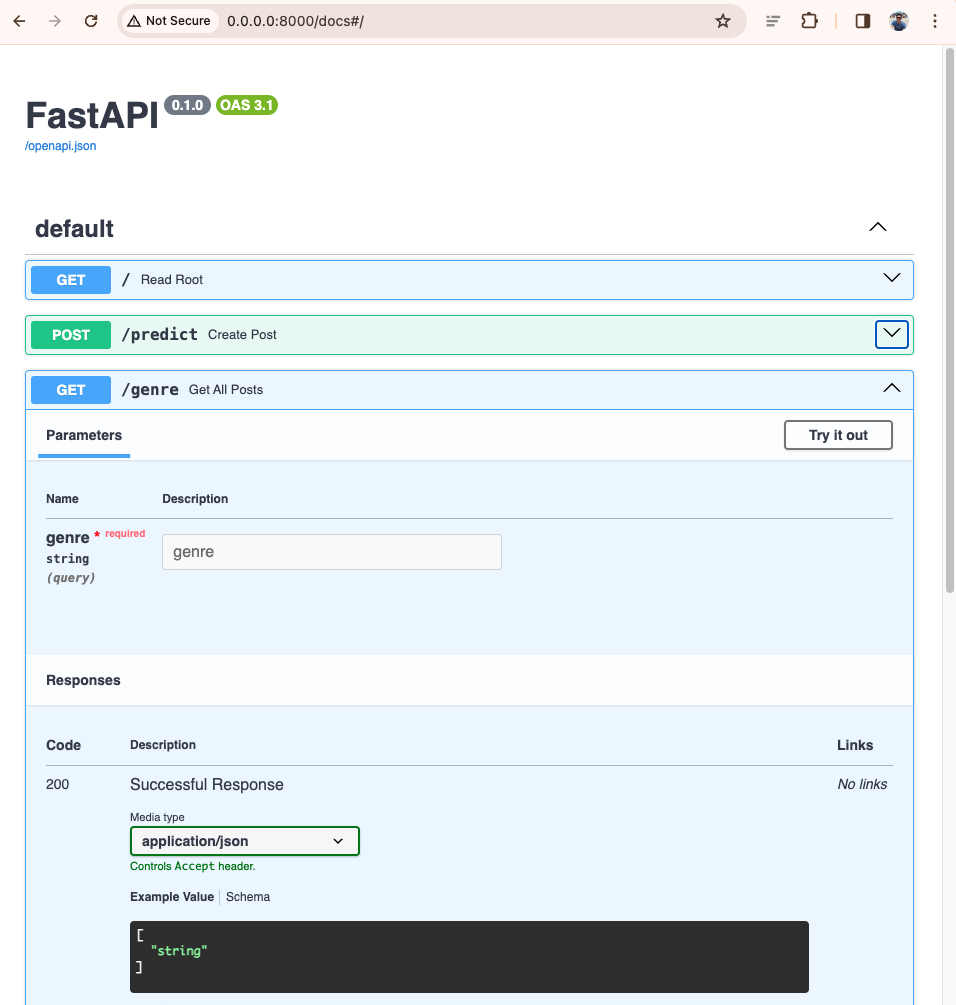

Two endpoints created
#### /predict 
To return a list of genre predictions based on given input. It takes multiple rows of data, but must have all 157 features available. Use XGBoost trained model. Then saving the result using SQLite and pandas

Input format example:

`{"tracks": [{"trackID":66, ... },{"trackID":55, ... }]}`

Output format example:

`{"genre": [{66:punk},{55,folk}]}`

#### /genre 
To return a list of song titles from a given genre from `music.db`. Search function to look up DB.

Input format example:

`"punk"`

Output format example:

`["title1","title2",...]`

## Create Database

SQLite and pandas is used to make `music.db` file in `SectionB/data/db` folder

It is updated by SectionB/src/utils/dbendpoint.py